In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import joblib


In [2]:
df = pd.read_csv(r'C:\Users\VIKRAM\Documents\carprice\Used Car Price Prediction\Dataset\car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.isnull().sum().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df = pd.get_dummies(df, drop_first=True)

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score

pred = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("R2 Score:", r2_score(y_test, pred))


MAE: 0.5991811475409826
R2 Score: 0.9644571443948353


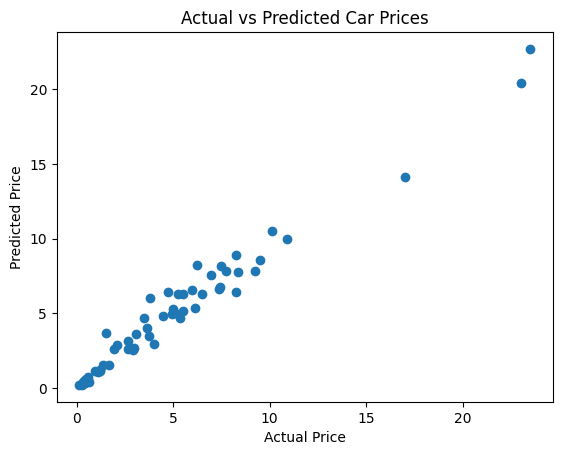

In [8]:
plt.scatter(y_test, pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


In [10]:
year = int(input("Enter car year: "))
present_price = float(input("Enter present price (lakhs): "))
driven_kms = int(input("Enter driven kilometers: "))
owner = int(input("Enter number of previous owners: "))

fuel = input("Fuel type (Petrol/Diesel): ").lower()
selling_type = input("Selling type (Dealer/Individual): ").lower()
transmission = input("Transmission (Manual/Automatic): ").lower()

input_data = {
    'Year': year,
    'Present_Price': present_price,
    'Driven_kms': driven_kms,
    'Owner': owner,
    'Fuel_Type_Diesel': 1 if fuel == 'diesel' else 0,
    'Fuel_Type_Petrol': 1 if fuel == 'petrol' else 0,
    'Selling_type_Individual': 1 if selling_type == 'individual' else 0,
    'Transmission_Manual': 1 if transmission == 'manual' else 0
}

input_df = pd.DataFrame([input_data])

print("Predicted Selling Price (lakhs):", round(rf.predict(input_df)[0], 2))


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Car_Name_Activa 3g
- Car_Name_Activa 4g
- Car_Name_Bajaj  ct 100
- Car_Name_Bajaj Avenger 150
- Car_Name_Bajaj Avenger 150 street
- ...


In [ ]:
joblib.dump(rf, 'car_price_model.pkl')
print("Model saved as car_price_model.pkl")


Model saved as car_price_model.pkl
